# Model Evaluation on Unseen Test Data (Logistic Regression)

This notebook evaluates our saved Logistic Regression model on the test dataset.

## 1. Import Libraries

In [51]:
import pandas as pd
import joblib 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2. Load Data and Model

In [11]:
# Load the trained model
try:
    model= joblib.load('../models/logistic_regression_model.pkl')
    print("Trained Logistic Regression Model loaded successfully.")
except FileNotFoundError:
    print("Error: 'logistic_regression_model.pkl' not found.")
    print("Please ensure you have run the training script to save the model.")

# Load the processed data
try:
    test_df= pd.read_csv('../data/processed/test.csv')
    print("Processed test data loaded successfully.")
except FileNotFoundError:
    print("Error: '../data/processed/test.csv' not found")
    print("Please ensure you have run the preprocessing.py script first.")

Trained Logistic Regression Model loaded successfully.
Processed test data loaded successfully.


## 3. Prepare the Data

In [16]:
X_test= test_df.drop('target', axis=1)
y_test= test_df['target']

print(f"Test set shape: {X_test.shape}")

Test set shape: (205, 22)


## 4. Evaluation

### Prediction

In [37]:
y_pred= model.predict(X_test)

print("-- Final Model Evaluation --")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

-- Final Model Evaluation --
Accuracy: 0.87


### Classification Report

In [39]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       100
           1       0.86      0.90      0.88       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



### Confusion Matrix

In [61]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[84 16]
 [10 95]]


## Evaluation Heatmap

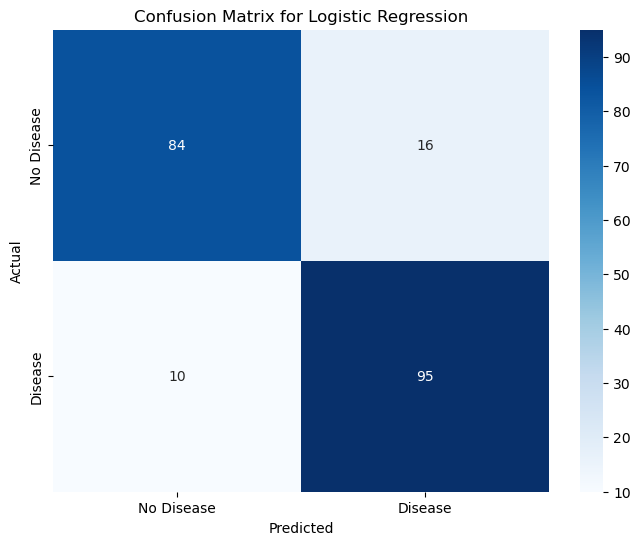

In [64]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.title("Confusion Matrix for Logistic Regression")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=["No Disease", "Disease"],yticklabels=["No Disease", "Disease"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()